![](ITD.png)
    
# Inteligencia Artificial

## Arboles de desición Dataset TITANIC
## Docente:

### Rodriguez Rivas Jose Gabriel
## Alumno:

### Jose Guadalupe Calderon Perez

### Aspectos básicos/situación
En esta práctica de laboratorio creará un clasificador de árbol de decisiones que funcione con un conjunto de datos que contenga detalles sobre los más de 1300 pasajeros que estaban a bordo del trasatlántico Titanic durante su trágico primer viaje.

Con los datos de arriba, ¿qué tipos de preguntas podemos hacer acerca de los factores que contribuyeron a que los pasajeros sobrevivan o fallecieran en la catástrofe del Titanic?


**R = Podemos cuestionarnos si el número de ticket como la cabina que tenía el pasajero fue influyente en la sobrevivencia**

## Parte 1: Crear un clasificador de árbol de decisiones

In [2]:
import pandas as pd
training = pd.read_csv('titanic-train.csv')

In [4]:
training.head(5)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",male,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S


In [5]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 12 columns):
PassengerId    915 non-null int64
Survived       915 non-null int64
Pclass         915 non-null int64
Name           915 non-null object
Gender         915 non-null object
Age            738 non-null float64
SibSp          915 non-null int64
Parch          915 non-null int64
Ticket         915 non-null object
Fare           915 non-null float64
Cabin          202 non-null object
Embarked       914 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 85.9+ KB


¿Faltan valores en el conjunto de datos?

**R = Si, faltan 177 registros en el campo de las edades.**

### Paso 2: Preparar los datos para el modelo de árbol de decisiones

In [6]:
training["Gender"] = training["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

In [7]:
training.head(5)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",0,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.0,0,0,7553,9.8375,NaN,S


In [8]:
training["Age"].fillna(training["Age"].mean(), inplace=True)

In [9]:
training.head(10)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.000000,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.000000,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",0,29.970867,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.000000,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.000000,0,0,7553,9.8375,NaN,S
5,6,0,2,"Bowenur, Mr. Solomon",0,42.000000,0,0,211535,13.0000,NaN,S
6,7,0,3,"Bowen, Mr. David John ""Dai""",0,21.000000,0,0,54636,16.1000,NaN,S
7,8,0,3,"Assam, Mr. Ali",0,23.000000,0,0,SOTON/O.Q. 3101309,7.0500,NaN,S
8,9,0,3,"Thomas, Mr. John",0,29.970867,0,0,2681,6.4375,NaN,C
9,10,0,3,"Moran, Mr. Daniel J",0,29.970867,1,0,371110,24.1500,NaN,Q


¿Cuál es el valor que se utilizó para reemplazar a las edades faltantes

**R=** 29.970867 (la media de las edades en el conjunto de datos)

### Paso 3: Entrenar y calificar el modelo del árbol de decisiones.

In [10]:
y_target = training["Survived"].values

In [11]:
columns = ["Fare", "Pclass", "Gender", "Age", "SibSp"]
#create the variable to hold the features that the classifier will use
X_input = training[list(columns)].values

In [12]:
from sklearn import tree

#create clf_train as a decision tree classifier object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#train the model using the fit() method of the decision tree object. 
#Supply the method with the input variable X_input and the target variable y_target
clf_train = clf_train.fit(X_input, y_target)

In [13]:
clf_train.score(X_input,y_target)

0.8163934426229508

### Paso 4: Visualizar el árbol

In [31]:
clasificacion = ['No sobrevivie','Sobrevivie']

In [26]:
import sklearn
#from sklearn.externals.six import StringIO
with open("titanic.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns, class_names = clasificacion)

In [27]:
!dot -Tpng titanic.dot -o titanic.png

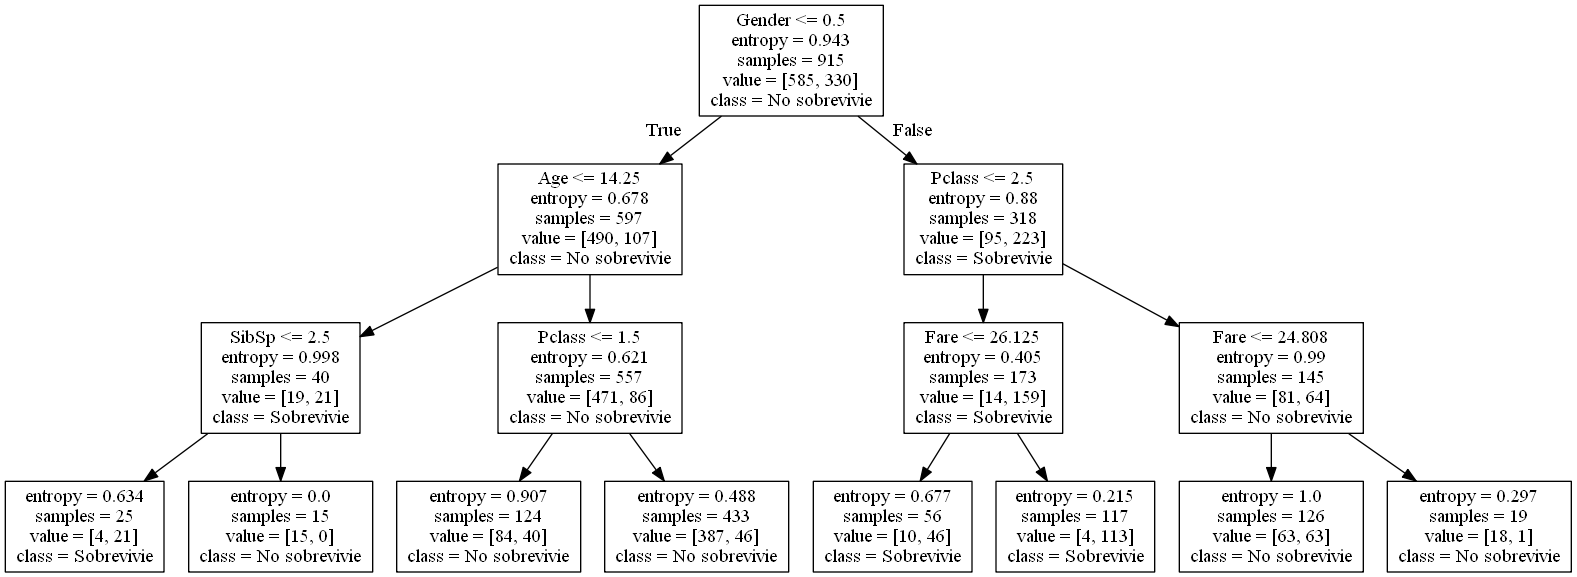

In [28]:
from IPython.display import Image

#display the decison tree graphic
Image("titanic.png")

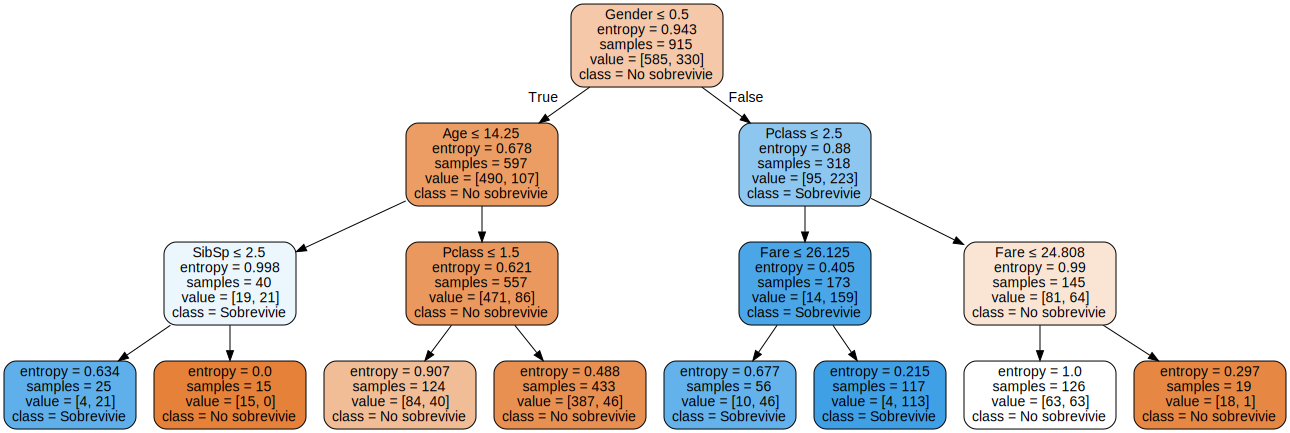

In [29]:
import graphviz
dot_data = tree.export_graphviz(clf_train, out_file=None,
                                class_names = clasificacion,
                                feature_names = columns,
                                filled = True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('Titanic_Color', format='png')
graph

¿Qué describe al grupo que tenía mayor cantidad de víctimas fatales? ¿Qué grupo tenía la mayor cantidad de sobrevivientes?

**R= Con base al género siendo hombre existe una cantidad mayor de víctimas y al contrario al ser mujer se cuenta con una cantidad mayor de sobrevivientes.**

## Parte 2: Aplicar el modelo del árbol de decisiones

In [3]:
testing = pd.read_csv("titanic-test.csv")

In [5]:
testing.head(5)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,916,0,2,"Coleridge, Mr. Reginald Charles",male,29.0,0,0,W./C. 14263,10.50,NaN,S
1,917,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1,1,16966,134.50,E34,C
2,918,0,3,"Windelov, Mr. Einar",male,21.0,0,0,SOTON/OQ 3101317,7.25,NaN,S
3,919,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.00,C78,Q
4,920,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.00,NaN,S


In [6]:
len(testing)

393

In [7]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 12 columns):
PassengerId    393 non-null int64
Survived       393 non-null int64
Pclass         393 non-null int64
Name           393 non-null object
Gender         393 non-null object
Age            307 non-null float64
SibSp          393 non-null int64
Parch          393 non-null int64
Ticket         393 non-null object
Fare           393 non-null float64
Cabin          93 non-null object
Embarked       392 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 37.0+ KB


¿Cuántos registros hay en el conjunto de datos?

**R= 393 resgistros**

¿Qué variable(s) importante(s) son valores faltantes y cuántas faltan?

**R= Hace falta adaptar el genero y la edad. Existen 86 valores faltantes en el campo de edades**

In [20]:
testing["Gender"] = testing["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

In [21]:
testing["Age"].fillna(testing["Age"].mean(), inplace=True)

In [22]:
testing.head(5)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,916,0,2,"Coleridge, Mr. Reginald Charles",0,29.0,0,0,W./C. 14263,10.50,NaN,S
1,917,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",1,40.0,1,1,16966,134.50,E34,C
2,918,0,3,"Windelov, Mr. Einar",0,21.0,0,0,SOTON/OQ 3101317,7.25,NaN,S
3,919,1,1,"Minahan, Miss. Daisy E",1,33.0,1,0,19928,90.00,C78,Q
4,920,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.00,NaN,S


### Paso 2: Etiquetar el conjunto de datos de prueba

In [23]:
X_input = testing[list(columns)].values

#### Hacer predicciones con el metodo predict del clasificador

In [24]:
target_labels = clf_train.predict(X_input)

#convert the target array into a pandas dataframe using the pd.DataFrame() method and target as argument
target_labels = pd.DataFrame({'Est_Survival':target_labels, 'Name':testing['Name']})

target_labels.head(5)

,Est_Survival,Name
0,0,"Coleridge, Mr. Reginald Charles"
1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn..."
2,0,"Windelov, Mr. Einar"
3,1,"Minahan, Miss. Daisy E"
4,0,"Wilkes, Mrs. James (Ellen Needs)"


In [25]:
import numpy as np
# Load data for all passengers in the variable all_data
all_data = pd.read_csv("titanic_all.csv")
# Merging using the field Name as key, selects only the rows of the two datasets that refer to the same passenger
testing_results = pd.merge(target_labels, all_data[['Name','Survived']], on=['Name'])

# Compute the accuracy as a ratio of matching observations to total osbervations. Store this in in the variable acc.
acc = np.sum(testing_results['Est_Survival'] == testing_results['Survived']) / float(len(testing_results))

print(acc)

0.7588832487309645


## Parte 3: Evaluar el modelo del árbol de decisiones

In [8]:
all_data = pd.read_csv("titanic_all.csv", usecols=['Survived','Pclass','Gender','Age','SibSp','Fare'])
all_data.head()

,Survived,Pclass,Gender,Age,SibSp,Fare
0,1,1,female,29.0000,0,211.3375
1,1,1,male,0.9167,1,151.5500
2,0,1,female,2.0000,1,151.5500
3,0,1,male,30.0000,1,151.5500
4,0,1,female,25.0000,1,151.5500


In [9]:
len(all_data)

1308

In [10]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 6 columns):
Survived    1308 non-null int64
Pclass      1308 non-null int64
Gender      1308 non-null object
Age         1045 non-null float64
SibSp       1308 non-null int64
Fare        1308 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 61.4+ KB


¿Cuántos registros hay en el conjunto de datos?

**R= 1380 registros**

¿Qué variable(s) importante(s) son valores faltantes y cuántas faltan?

**R= Falta dar un formato adecuado al genero y la edad. Faltan 263 valores en el campo de edades.**

In [30]:
all_data["Gender"] = all_data["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

In [31]:
all_data["Age"].fillna(all_data["Age"].mean(), inplace=True)

In [32]:
all_data.head()

,Survived,Pclass,Gender,Age,SibSp,Fare
0,1,1,1,29.0000,0,211.3375
1,1,1,0,0.9167,1,151.5500
2,0,1,1,2.0000,1,151.5500
3,0,1,0,30.0000,1,151.5500
4,0,1,1,25.0000,1,151.5500


### Paso 2: Crear las variables de entradas y salida para el conjunto de datos de entrenamiento y prueba

In [34]:
from sklearn.model_selection import train_test_split

#create the input and target variables as uppercase X and lowercase y. Reuse the columns variable.
X = all_data[list(columns)].values
y = all_data["Survived"].values

#generate the four testing and training data arrays with the train_test_split() method
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.40, random_state=0)

In [35]:
type(X_train)

numpy.ndarray

In [36]:
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#fit the training model using the input and target variables
clf_train = clf_train.fit(X_train, y_train)

In [37]:
train_score = str(clf_train.score(X_train,y_train))
test_score = str(clf_train.score(X_test,y_test))

#output the values in a test string
print('Training score = '+ train_score+' Testing score = '+test_score)

Training score = 0.8201530612244898 Testing score = 0.8053435114503816


## Tarea
**1. Eliminar las observaciones con valores de edad faltantes**
El uso de un promedio para reemplazar los valores de edad faltantes puede afectar la precisión del modelo. Una solución para esto puede ser eliminar todas las observaciones con valores de edad faltantes. Si bien esto reducirá el tamaño del conjunto de datos de entrenamiento, podría mejorar la precisión.

In [14]:
training = pd.read_csv('titanic-train.csv')

In [15]:
training.head(5)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",male,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S


In [16]:
training["Gender"] = training["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

In [17]:
training.isnull().sum().sum()

891

In [18]:
training_clean = training.dropna()

In [19]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 12 columns):
PassengerId    915 non-null int64
Survived       915 non-null int64
Pclass         915 non-null int64
Name           915 non-null object
Gender         915 non-null int64
Age            738 non-null float64
SibSp          915 non-null int64
Parch          915 non-null int64
Ticket         915 non-null object
Fare           915 non-null float64
Cabin          202 non-null object
Embarked       914 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 85.9+ KB


In [20]:
training_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 0 to 905
Data columns (total 12 columns):
PassengerId    186 non-null int64
Survived       186 non-null int64
Pclass         186 non-null int64
Name           186 non-null object
Gender         186 non-null int64
Age            186 non-null float64
SibSp          186 non-null int64
Parch          186 non-null int64
Ticket         186 non-null object
Fare           186 non-null float64
Cabin          186 non-null object
Embarked       186 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 18.9+ KB


In [21]:
training.dropna(subset=['Age'],inplace=True)

In [22]:
y_target = training["Survived"].values

In [23]:
columns = ["Fare", "Pclass", "Gender", "Age", "SibSp"]
#create the variable to hold the features that the classifier will use
X_input = training[list(columns)].values

In [24]:
from sklearn import tree

#create clf_train as a decision tree classifier object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#train the model using the fit() method of the decision tree object. 
#Supply the method with the input variable X_input and the target variable y_target
clf_train = clf_train.fit(X_input, y_target)

In [25]:
clf_train.score(X_input,y_target)

0.8252032520325203

In [26]:
import sklearn
#from sklearn.externals.six import StringIO
with open("titanic2.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns)

In [27]:
!dot -Tpng titanic2.dot -o titanic2.png

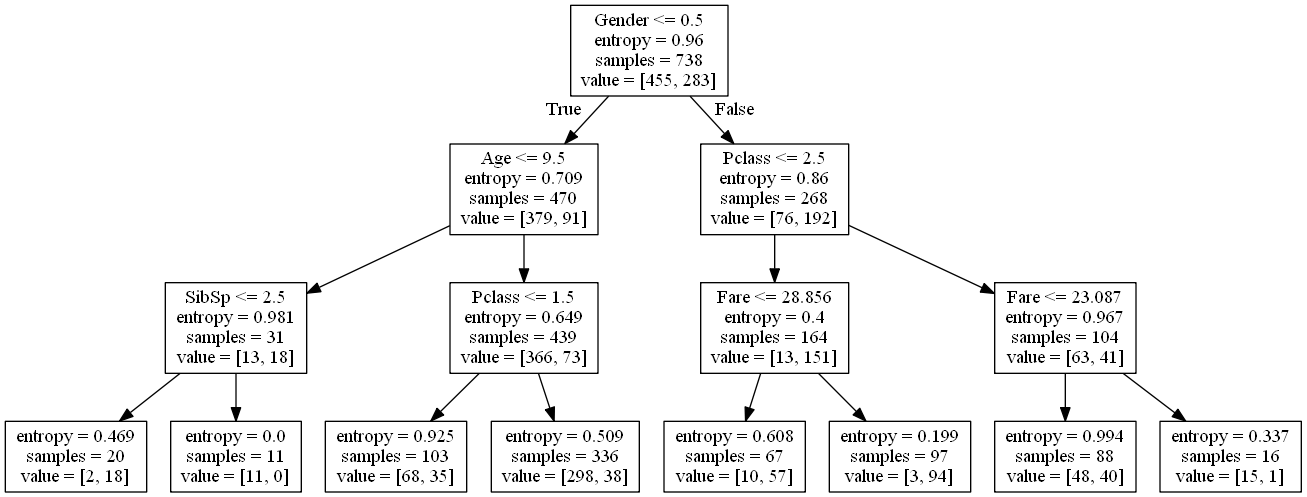

In [28]:
from IPython.display import Image

#display the decison tree graphic
Image("titanic2.png")

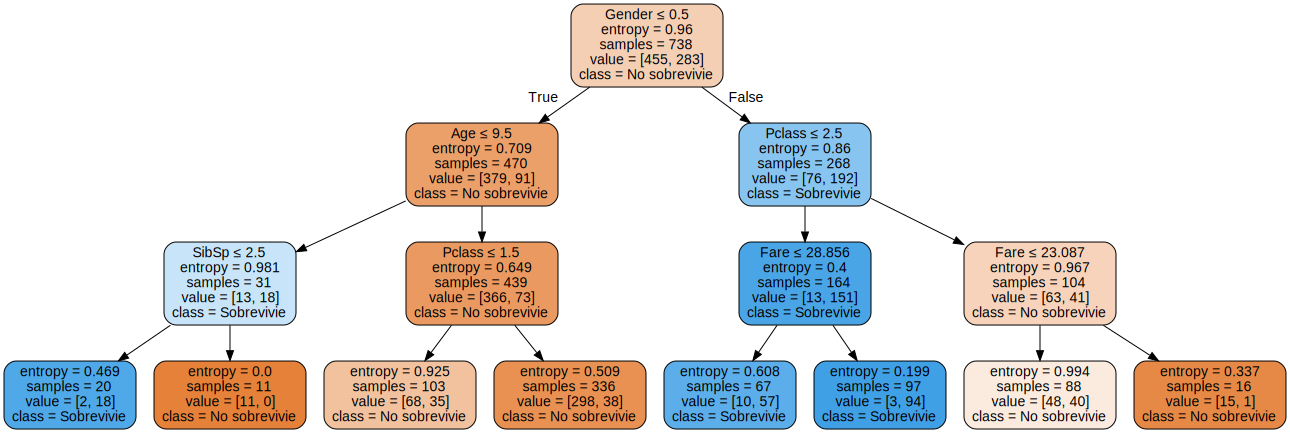

In [32]:
import graphviz
dot_data = tree.export_graphviz(clf_train, out_file=None,
                                class_names = clasificacion,
                                feature_names = columns,
                                filled = True, rounded=True,
                                special_characters=True)
graph2 = graphviz.Source(dot_data)
graph2.render('Titanic_Color2', format='png')
graph2

#### Reflexion que diferencia se obtuvo al ejecutar el entrenamiendo eliminando los valores NaN de la edad.
**1.Fue mas efectivo.**

**R = Aunque el número de personas haya disminuido al eliminar los resultados donde la edad es nula, el resultado en cada grupo de si sobrevivió o no, sigue siendo el mismo resultado.**

**2.Que porcentaje se obtuvo.**

**R = 0.8252032520325203. un punto más alto que cuando se toma en cuentas las edades.**

**3.Conclusiones.**

**R = Al parecer la variable que más afectaba en la supervivencia en el titanic era el género y la edad, ya que como se vio en la película "Niños y Mujeres primero”. De igual manera la tarifa del boleto también tiene relevancia, ya que aquellos donde su tarifa era mayor sobrevivieron y donde la tarifa era menor no. Y en cuanto a la clase independientemente cual fuera el resultado es el mismo no sobrevivió**